# How are in-demand skills trending for Data Engineers?
## Methodology
1. Aggregate skill counts monthly.
2. Re-analyse based on percentage of total jobs.
3. Plot the monthly skill demand.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/munchymahesh/Desktop/Python/Data_Project_On_Python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_DE_AUS = df[(df['job_country']=='Australia') & (df['job_title_short']=='Data Engineer')].copy() # Filtering for Australia Data Engineer jobs
df_DE_AUS['job_posted_month_no']= df_DE_AUS['job_posted_date'].dt.month # Extracting month number

In [7]:
df_DE_AUS_exploded = df_DE_AUS.explode('job_skills')  # Exploding job skills for analysis

df_DE_AUS_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,react,"{'analyst_tools': ['excel'], 'libraries': ['re...",2
1178,Data Engineer,Data Center Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-02-09 13:38:29,False,False,Australia,None,NaN,NaN,Technical Global Solutions,excel,"{'analyst_tools': ['excel'], 'libraries': ['re...",2
1299,Data Engineer,Data Platform Engineer,"Sydney NSW, Australia",via Hatch,Full-time,False,Australia,2023-05-03 13:46:57,False,False,Australia,None,NaN,NaN,WooliesX,None,None,5
1601,Data Engineer,Data Engineer. Job in Canberra My Valley Jobs ...,"Canberra ACT, Australia",via My Valley Jobs Today,Full-time,False,Australia,2023-02-01 14:05:02,True,False,Australia,None,NaN,NaN,CYOS Solutions,python,"{'cloud': ['azure'], 'databases': ['mongodb', ...",2
1601,Data Engineer,Data Engineer. Job in Canberra My Valley Jobs ...,"Canberra ACT, Australia",via My Valley Jobs Today,Full-time,False,Australia,2023-02-01 14:05:02,True,False,Australia,None,NaN,NaN,CYOS Solutions,nosql,"{'cloud': ['azure'], 'databases': ['mongodb', ...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,airflow,"{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak...",1
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,docker,"{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak...",1
785377,Data Engineer,Data Engineer,"Melbourne VIC, Australia",via LinkedIn,Full-time,False,Australia,2023-01-09 06:15:32,False,False,Australia,None,NaN,NaN,eliiza,kubernetes,"{'cloud': ['aws', 'gcp', 'bigquery', 'snowflak...",1
785430,Data Engineer,Azure Data Engineer,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-01-31 06:27:09,False,False,Australia,None,NaN,NaN,Tata Consultancy Services,azure,"{'analyst_tools': ['power bi'], 'cloud': ['azu...",1


In [ ]:
df_DE_AUS_pivot = df_DE_AUS_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0) # Creating pivot table for skills trend analysis
df_DE_AUS_pivot.loc['Total'] =df_DE_AUS_pivot.sum()  # Adding total row for overall skill demand so that it can be sorted.
df_DE_AUS_pivot[df_DE_AUS_pivot.loc['Total'].sort_values(ascending=False).index] # Sorting columns based on total demand
df_DE_AUS_pivot = df_DE_AUS_pivot.drop('Total')  # Dropping total row for plotting
df_DE_AUS_pivot

job_skills,airflow,alteryx,angular,ansible,asana,asp.net,asp.net core,assembly,atlassian,aurora,...,visual basic,vmware,vue,vue.js,watson,windows,wire,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,96,17,1,16,3,0,0,0,4,11,...,0,3,0,0,0,14,1,14,2,2
2,51,8,0,8,2,0,0,0,0,6,...,0,4,0,0,0,2,1,8,1,1
3,39,6,0,7,0,0,0,0,6,4,...,0,1,0,1,0,10,0,8,2,3
4,35,9,0,5,0,1,0,0,5,1,...,0,4,0,0,0,5,0,6,2,1
5,39,1,1,5,0,2,1,0,7,4,...,0,3,0,1,0,2,0,4,0,0
6,41,5,0,4,0,0,0,1,4,1,...,0,2,0,0,0,2,0,5,0,0
7,36,5,0,5,0,0,0,0,3,1,...,0,5,0,0,0,5,0,6,0,0
8,53,1,0,12,0,0,0,1,5,1,...,0,2,1,1,1,4,0,14,2,0
9,41,10,0,4,0,0,0,0,1,0,...,0,2,0,0,0,1,0,12,1,0


### 2. Getting Percentage

In [22]:
DE_Totals = df_DE_AUS.groupby('job_posted_month_no').size() # Getting total job postings per month
df_DE_AUS_percent = df_DE_AUS_pivot.div(DE_Totals/100, axis=0)  # Calculating percentage demand for each skill per month

#Changes month number to month name for better readability
df_DE_AUS_percent =df_DE_AUS_percent.reset_index()
df_DE_AUS_percent['job_posted_month'] = df_DE_AUS_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_DE_AUS_percent = df_DE_AUS_percent.set_index('job_posted_month')
df_DE_AUS_percent =  df_DE_AUS_percent.drop(columns='job_posted_month_no')

df_DE_AUS_percent

job_skills,airflow,alteryx,angular,ansible,asana,asp.net,asp.net core,assembly,atlassian,aurora,...,visual basic,vmware,vue,vue.js,watson,windows,wire,word,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,12.631579,2.236842,0.131579,2.105263,0.394737,0.000000,0.000000,0.000000,0.526316,1.447368,...,0.000000,0.394737,0.00000,0.000000,0.000000,1.842105,0.131579,1.842105,0.263158,0.263158
Feb,14.127424,2.216066,0.000000,2.216066,0.554017,0.000000,0.000000,0.000000,0.000000,1.662050,...,0.000000,1.108033,0.00000,0.000000,0.000000,0.554017,0.277008,2.216066,0.277008,0.277008
Mar,10.483871,1.612903,0.000000,1.881720,0.000000,0.000000,0.000000,0.000000,1.612903,1.075269,...,0.000000,0.268817,0.00000,0.268817,0.000000,2.688172,0.000000,2.150538,0.537634,0.806452
Apr,9.971510,2.564103,0.000000,1.424501,0.000000,0.284900,0.000000,0.000000,1.424501,0.284900,...,0.000000,1.139601,0.00000,0.000000,0.000000,1.424501,0.000000,1.709402,0.569801,0.284900
May,13.879004,0.355872,0.355872,1.779359,0.000000,0.711744,0.355872,0.000000,2.491103,1.423488,...,0.000000,1.067616,0.00000,0.355872,0.000000,0.711744,0.000000,1.423488,0.000000,0.000000
Jun,13.183280,1.607717,0.000000,1.286174,0.000000,0.000000,0.000000,0.321543,1.286174,0.321543,...,0.000000,0.643087,0.00000,0.000000,0.000000,0.643087,0.000000,1.607717,0.000000,0.000000
Jul,9.651475,1.340483,0.000000,1.340483,0.000000,0.000000,0.000000,0.000000,0.804290,0.268097,...,0.000000,1.340483,0.00000,0.000000,0.000000,1.340483,0.000000,1.608579,0.000000,0.000000
Aug,11.496746,0.216920,0.000000,2.603037,0.000000,0.000000,0.000000,0.216920,1.084599,0.216920,...,0.000000,0.433839,0.21692,0.216920,0.216920,0.867679,0.000000,3.036876,0.433839,0.000000
Sep,9.951456,2.427184,0.000000,0.970874,0.000000,0.000000,0.000000,0.000000,0.242718,0.000000,...,0.000000,0.485437,0.00000,0.000000,0.000000,0.242718,0.000000,2.912621,0.242718,0.000000


### 3. Plotting the data

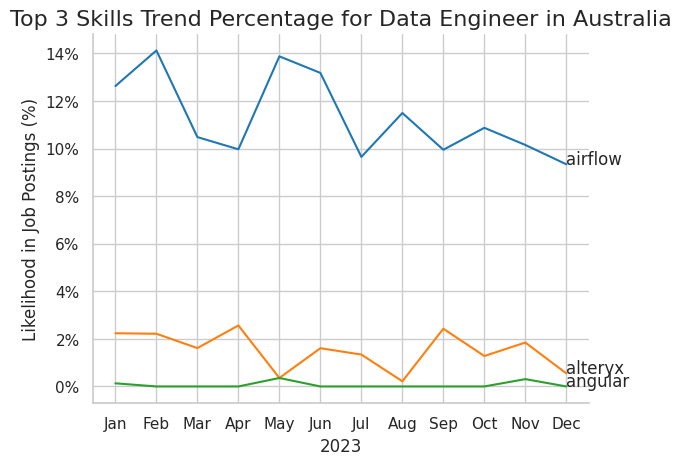

In [39]:
df_plot = df_DE_AUS_percent.iloc[:,:3] # Displaying top 3 skills trend percentage
sns.lineplot(data=df_plot,dashes=False, palette='tab10')
sns.set_theme(style="whitegrid")
sns.despine() # Removing top and right spines (borders) for better aesthetics

plt.title('Top 3 Skills Trend Percentage for Data Engineer in Australia', fontsize=16)
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings (%)')
plt.legend().remove()

# Formatting y-axis to show percentage
from matplotlib.ticker import PercentFormatter
ax = plt.gca()  # Getting current axis
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))  # Formatting y-axis to percentage

# Adding skill names at the end of each line for clarity
for i in range(3):
    plt.text(11,df_plot.iloc[-1,i],df_plot.columns[i]) #11 is the index for December, df_plot.iloc[-1,i] gets the last row value for each skill ,df_plot.columns[i] gets the skill name
plt.show()